<a href="https://colab.research.google.com/github/boyyys/praktikumSIM_VideoGameSales/blob/main/praktikumSIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales (1).csv


In [ ]:
df = pd.read_csv('vgsales.csv', encoding='latin1')


#Menampilkan informasi umum tentang DataFrame:

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Memberikan statistik ringkasan untuk kolom numerik:

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Menampilkan 5 baris pertama dari DataFrame (bisa ditentukan jumlah baris dengan df.head(n))

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#wrangling data

# Menangani Nilai Kosong (Missing Values)

In [ ]:
# Memeriksa nilai kosong (missing values)
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# Menghapus baris dengan nilai kosong
df_clean = df.dropna()  # Menghapus baris dengan nilai kosong

In [ ]:
# Menampilkan hasil setelah pembersihan
df_clean.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# Menghapus baris dengan nilai NaN pada kolom 'Year' dan 'Global_Sales'
df.dropna(subset=['Year', 'Global_Sales','Publisher'], inplace=True)

# Mengonversi 'Year' menjadi integer (jika ada nilai desimal)
df['Year'] = df['Year'].astype(int)

# Memeriksa apakah ada nilai NaN setelah pembersihan
df.isnull().sum()


,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


#Mengonversi Tipe Data yang Tidak Tepat

In [ ]:
# Mengonversi kolom 'Year' ke tipe integer
df_clean['Year'] = df_clean['Year'].astype(int)

In [ ]:
# Mengonversi kolom 'Genre' dan 'Publisher' ke kategori
df_clean['Genre'] = df_clean['Genre'].astype('category')
df_clean['Publisher'] = df_clean['Publisher'].astype('category')

In [ ]:
# Memeriksa tipe data setelah konversi
df_clean.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,int64
Genre,category
Publisher,category
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


#Memeriksa Duplikasi Data

In [ ]:
# Memeriksa apakah ada duplikasi di seluruh dataset
df.duplicated()

# Memeriksa jumlah duplikasi
df.duplicated().sum()

np.int64(0)

In [ ]:
# Memeriksa duplikasi berdasarkan satu kolom
df['Genre'].duplicated().sum()

np.int64(16279)

In [ ]:
# Memeriksa duplikasi berdasarkan satu kolom
df['Rank'].duplicated().sum()

np.int64(0)

In [ ]:
# Memeriksa duplikasi berdasarkan satu kolom
df['Platform'].duplicated().sum()

np.int64(16260)

In [ ]:
# Memeriksa duplikasi berdasarkan satu kolom
df['Publisher'].duplicated().sum()

np.int64(15715)

In [ ]:
# Memeriksa duplikasi berdasarkan beberapa kolom
df[['Name']].duplicated().sum()

np.int64(4966)

In [ ]:
# Memeriksa duplikasi berdasarkan beberapa kolom
df[['Year']].duplicated().sum()

np.int64(16252)

In [ ]:
# Memeriksa duplikasi berdasarkan beberapa kolom
df[['NA_Sales']].duplicated().sum()

np.int64(15883)

In [ ]:
# Memeriksa duplikasi berdasarkan beberapa kolom
df[['EU_Sales']].duplicated().sum()

np.int64(15986)

In [ ]:
# Memeriksa duplikasi berdasarkan beberapa kolom
df[['JP_Sales']].duplicated().sum()

np.int64(16047)

In [ ]:
# Memeriksa duplikasi berdasarkan beberapa kolom
df[['Other_Sales']].duplicated().sum()

np.int64(16134)

In [ ]:
# Memeriksa duplikasi berdasarkan beberapa kolom
df[['Global_Sales']].duplicated().sum()

np.int64(15670)

In [ ]:
# Menghapus duplikasi dari seluruh dataset
df_clean = df.drop_duplicates()

# Memeriksa duplikasi setelah penghapusan
df_clean.duplicated().sum()


np.int64(0)

In [ ]:
# Menghapus duplikasi berdasarkan beberapa kolom
df_clean = df.drop_duplicates(subset=['Name', 'Year','Platform','Publisher','Genre','Rank'])

# Memeriksa duplikasi setelah penghapusan
df_clean.duplicated().sum()

np.int64(0)

In [ ]:
# Menghapus duplikasi berdasarkan beberapa kolom
df_clean = df.drop_duplicates(subset=['NA_Sales','EU_Sales','JP_Sales'])

# Memeriksa duplikasi setelah penghapusan
df_clean.duplicated().sum()

np.int64(0)

In [ ]:
# Menghapus duplikasi berdasarkan beberapa kolom
df_clean = df.drop_duplicates(subset=['Other_Sales','Global_Sales'])

# Memeriksa duplikasi setelah penghapusan
df_clean.duplicated().sum()

np.int64(0)

In [ ]:
# Memeriksa duplikasi di kolom 'Genre' setelah penghapusan
df_clean['Genre'].duplicated().sum()


np.int64(2782)

In [ ]:
# Memeriksa duplikasi di kolom 'EU_Sales' setelah penghapusan
df_clean['EU_Sales'].duplicated().sum()

np.int64(2489)

In [ ]:
# Memeriksa duplikasi setelah penghapusan
df_clean.duplicated().sum()


np.int64(0)

In [ ]:
# Pastikan df sudah didefinisikan sebelum menyimpan
df.to_csv('/content/processed_data.csv', index=False)


#EDA

##Memeriksa Nilai-Nilai Unik dan Distribusi

In [ ]:
# Nilai unik untuk kolom kategorikal
print(df['Genre'].value_counts())
print(df['Platform'].value_counts())
print(df['Publisher'].value_counts())


Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64
Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64
Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
King Records                       1
Graphsim 

##Visualisasi Distribusi Penjualan

###Distribusi Penjualan Global

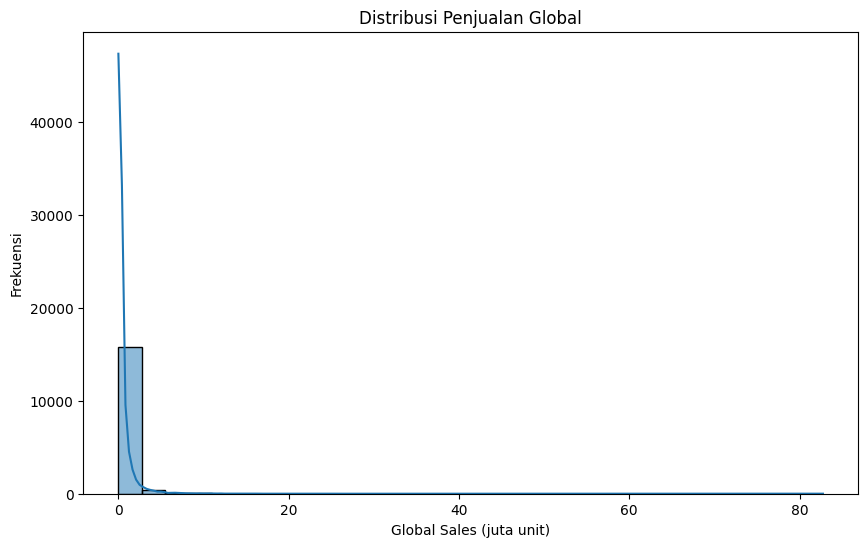

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram distribusi Global_Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title('Distribusi Penjualan Global')
plt.xlabel('Global Sales (juta unit)')
plt.ylabel('Frekuensi')
plt.show()


###Distribusi Penjualan Berdasarkan Wilayah

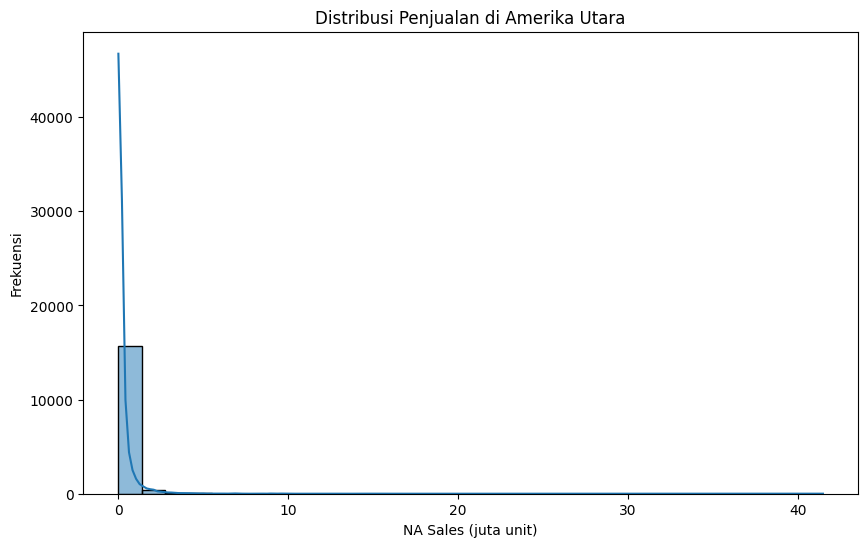

In [ ]:
  # Histogram distribusi NA_Sales (penjualan di Amerika Utara)
plt.figure(figsize=(10, 6))
sns.histplot(df['NA_Sales'], bins=30, kde=True)
plt.title('Distribusi Penjualan di Amerika Utara')
plt.xlabel('NA Sales (juta unit)')
plt.ylabel('Frekuensi')
plt.show()

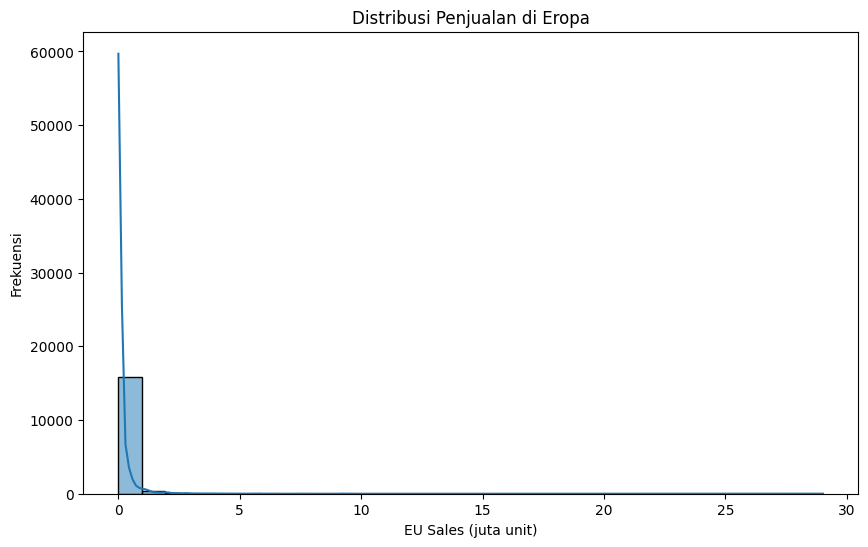

In [ ]:
# Histogram distribusi EU_Sales (penjualan di Eropa)
plt.figure(figsize=(10, 6))
sns.histplot(df['EU_Sales'], bins=30, kde=True)
plt.title('Distribusi Penjualan di Eropa')
plt.xlabel('EU Sales (juta unit)')
plt.ylabel('Frekuensi')
plt.show()


###Boxplot untuk Menangkap Outlier Penjualan Global

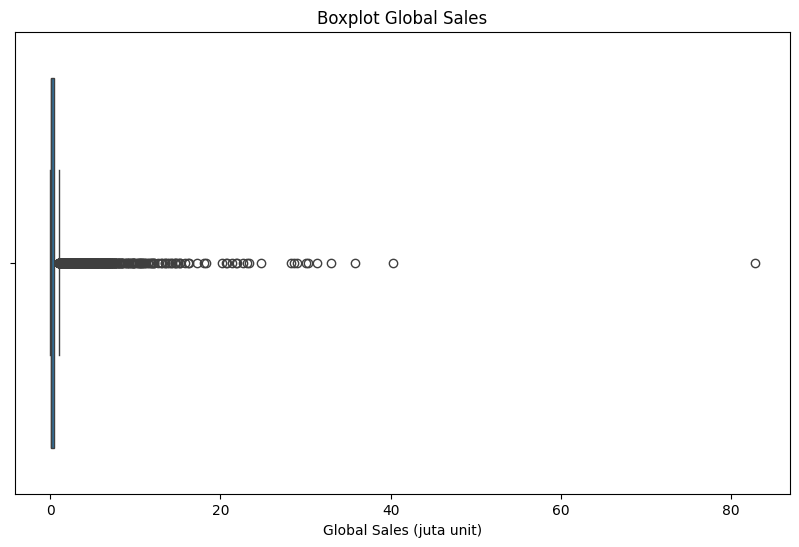

In [ ]:
# Boxplot untuk 'Global_Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Global_Sales'])
plt.title('Boxplot Global Sales')
plt.xlabel('Global Sales (juta unit)')
plt.show()


### Boxplot untuk Menangkap Outlier Penjualan Berdasarkan Wilayah

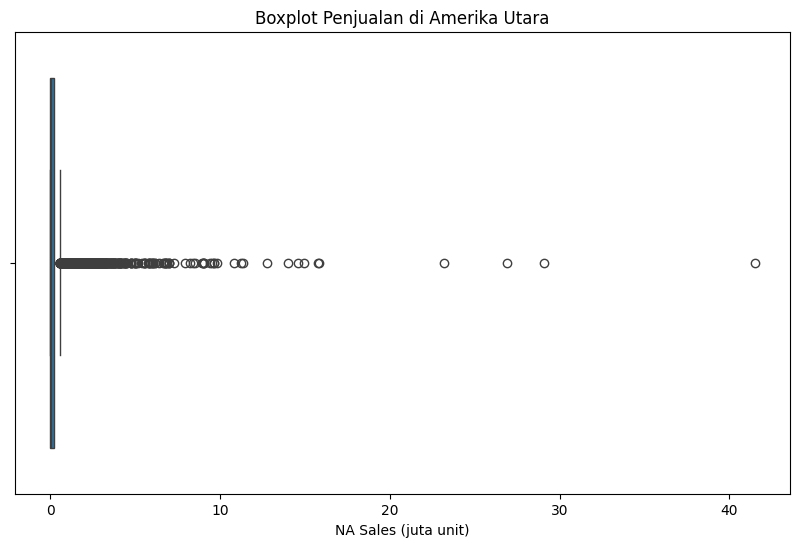

In [ ]:
# Boxplot untuk 'NA_Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['NA_Sales'])
plt.title('Boxplot Penjualan di Amerika Utara')
plt.xlabel('NA Sales (juta unit)')
plt.show()


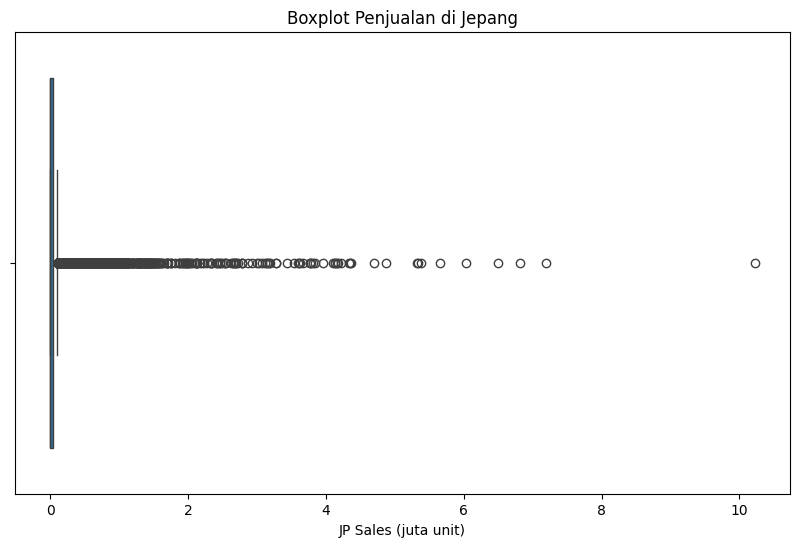

In [ ]:
# Boxplot untuk 'JP_Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['JP_Sales'])
plt.title('Boxplot Penjualan di Jepang')
plt.xlabel('JP Sales (juta unit)')
plt.show()


## Analisis Penjualan Berdasarkan Genre

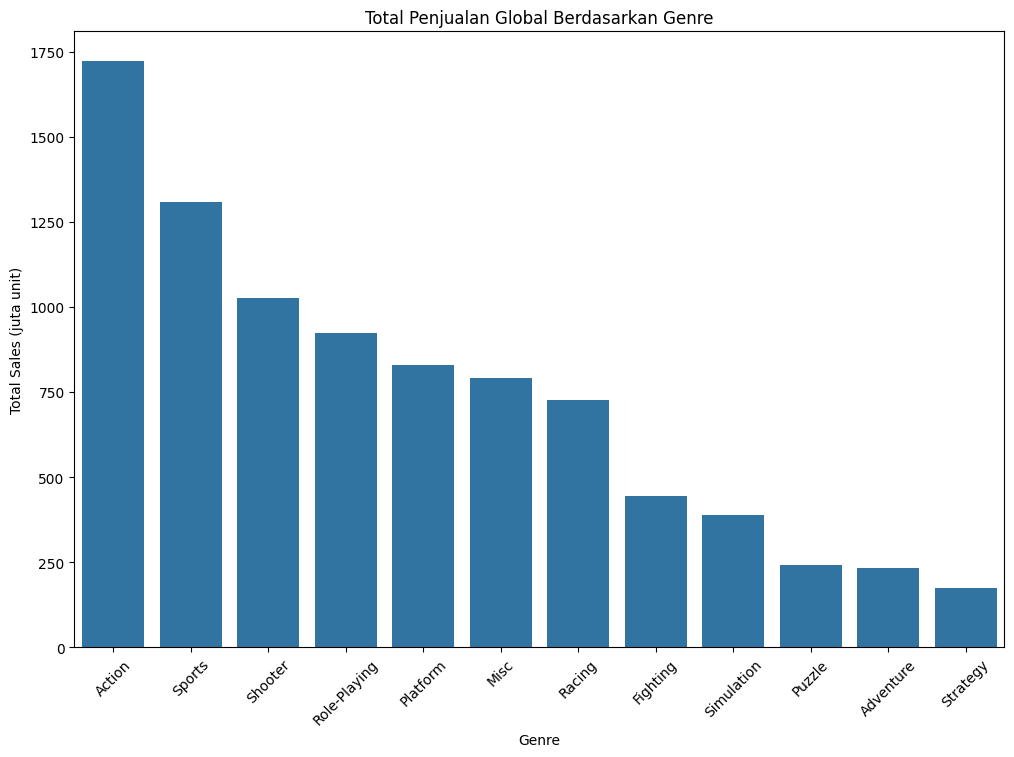

In [ ]:
# Penjualan total per genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Barplot untuk penjualan berdasarkan genre
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Total Penjualan Global Berdasarkan Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (juta unit)')
plt.xticks(rotation=45)
plt.show()


##Analisis Penjualan Berdasarkan Platform

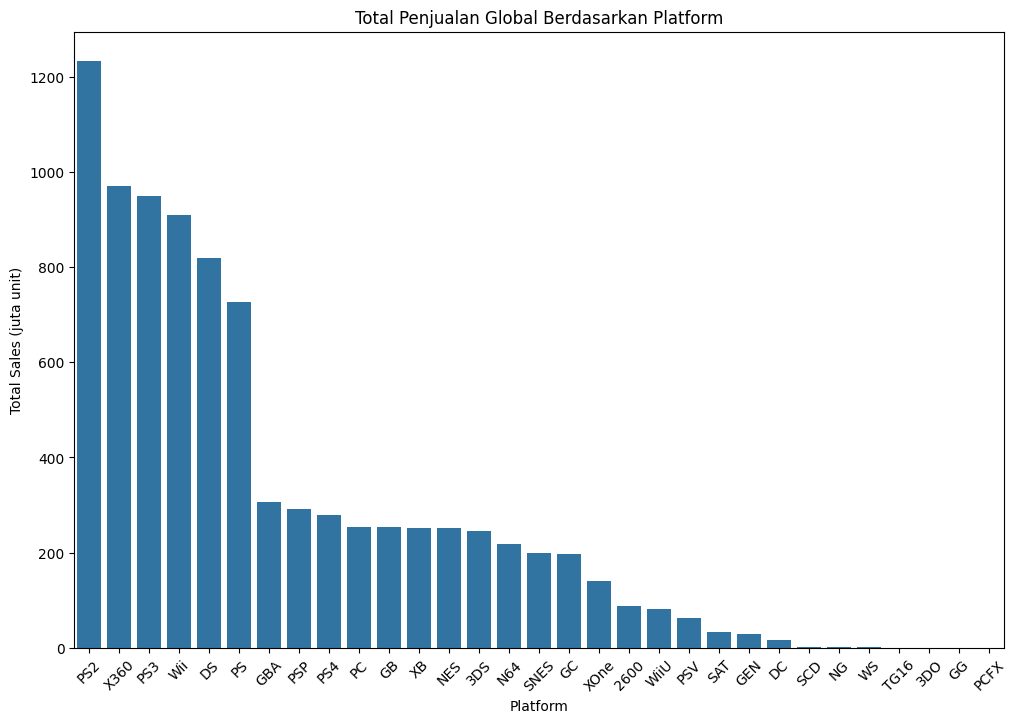

In [ ]:
# Penjualan per platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Barplot untuk penjualan berdasarkan platform
plt.figure(figsize=(12, 8))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Total Penjualan Global Berdasarkan Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (juta unit)')
plt.xticks(rotation=45)
plt.show()


##Analisis Penjualan Berdasarkan Tahun Rilis

###a. Jumlah Game per Tahun

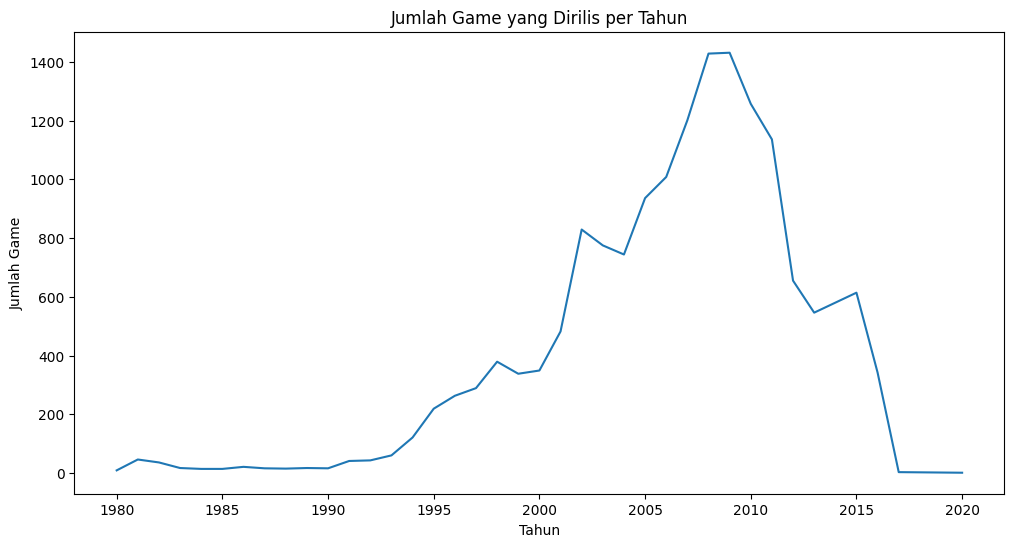

In [ ]:
# Jumlah game per tahun
games_per_year = df['Year'].value_counts().sort_index()

# Lineplot jumlah game yang dirilis per tahun
plt.figure(figsize=(12, 6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.title('Jumlah Game yang Dirilis per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Game')
plt.show()


###b. Penjualan Global per Tahun

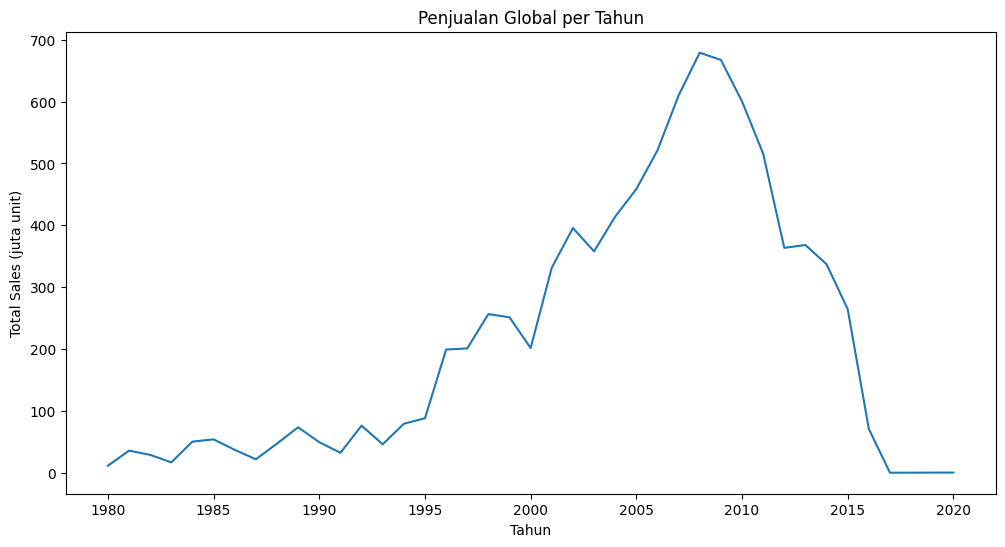

In [ ]:
# Penjualan global per tahun
sales_per_year = df.groupby('Year')['Global_Sales'].sum()

# Lineplot penjualan global per tahun
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_per_year.index, y=sales_per_year.values)
plt.title('Penjualan Global per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Sales (juta unit)')
plt.show()


##Korelasi Antara Kolom Penjualan

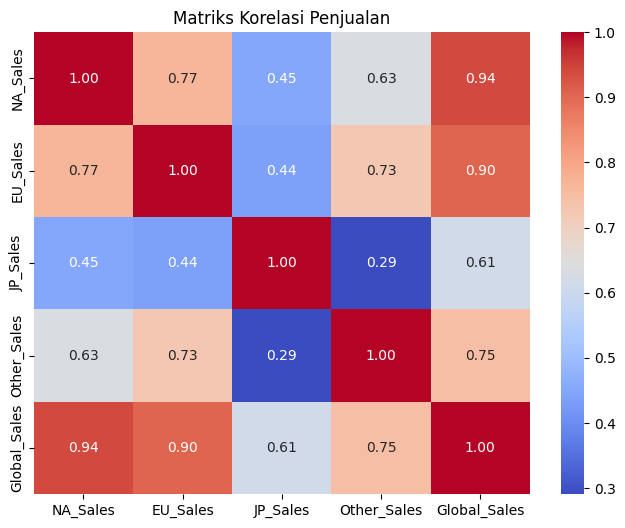

In [ ]:
# Korelasi antar kolom penjualan
corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Penjualan')
plt.show()


##Top Publisher

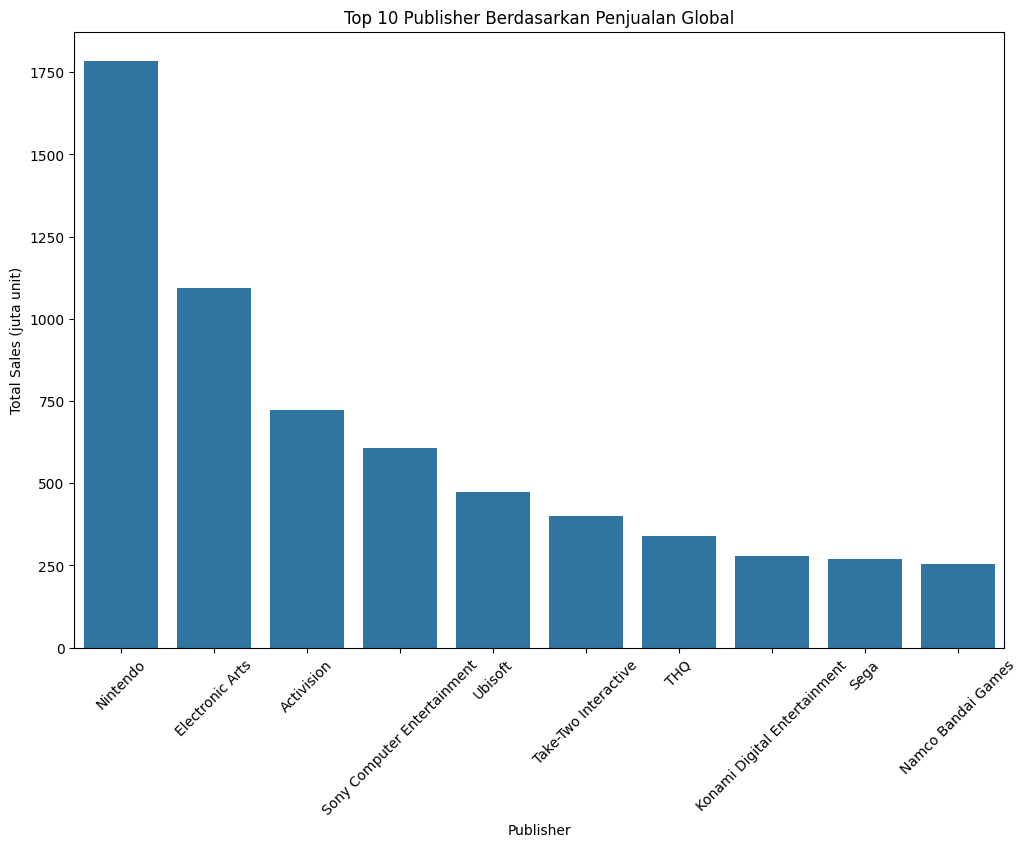

In [ ]:
# Penjualan per penerbit
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Barplot untuk penjualan berdasarkan publisher
plt.figure(figsize=(12, 8))
sns.barplot(x=publisher_sales.head(10).index, y=publisher_sales.head(10).values)
plt.title('Top 10 Publisher Berdasarkan Penjualan Global')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (juta unit)')
plt.xticks(rotation=45)
plt.show()


#pertanyaan

## 1. Apa genre video game dengan penjualan global tertinggi?

In [ ]:
# Kelompokkan data berdasarkan genre dan hitung total penjualan global
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Menampilkan genre dengan total penjualan global tertinggi
genre_sales


,Global_Sales
Genre,
Action,1722.84
Sports,1309.24
Shooter,1026.20
Role-Playing,923.83
Platform,829.13
Misc,789.87
Racing,726.76
Fighting,444.05
Simulation,389.98


<ipython-input-59-40180629>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")


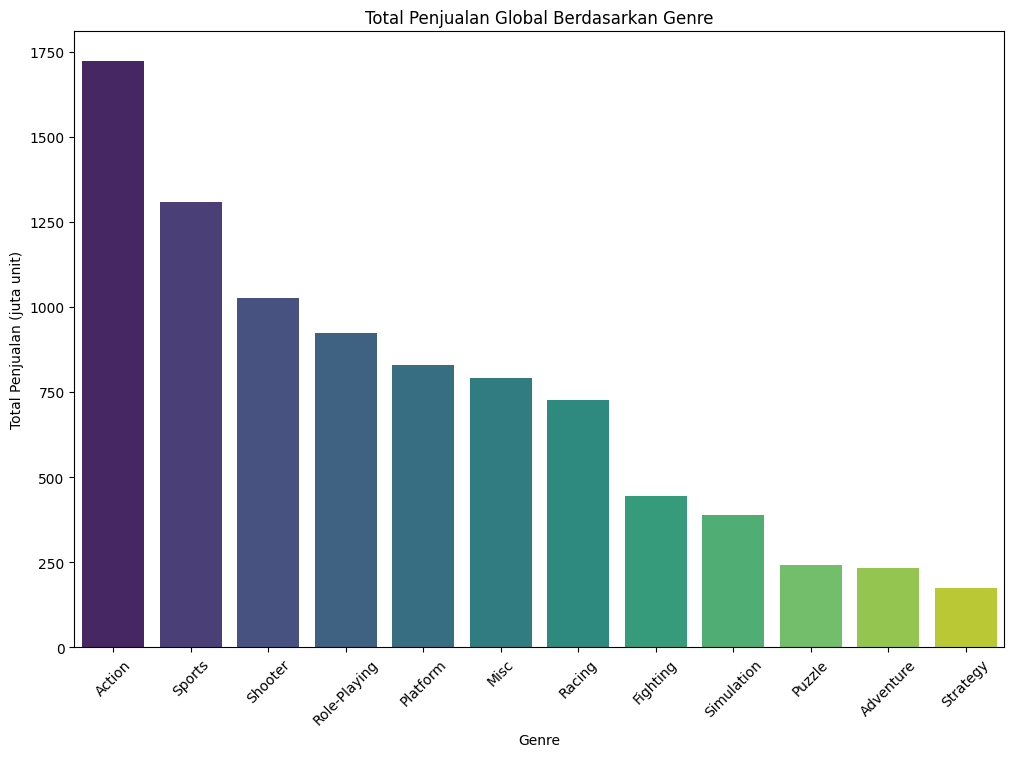

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat barplot untuk genre dengan penjualan global tertinggi
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.title('Total Penjualan Global Berdasarkan Genre')
plt.xlabel('Genre')
plt.ylabel('Total Penjualan (juta unit)')
plt.xticks(rotation=45)
plt.show()


## 2. Bagaimana distribusi penjualan video game berdasarkan platform?




In [ ]:
# Kelompokkan data berdasarkan platform dan hitung total penjualan global
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Menampilkan penjualan berdasarkan platform
platform_sales


,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35
Wii,909.81
DS,818.91
PS,727.39
GBA,305.62
PSP,291.71
PS4,278.10


<ipython-input-61-3841345700>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="viridis")


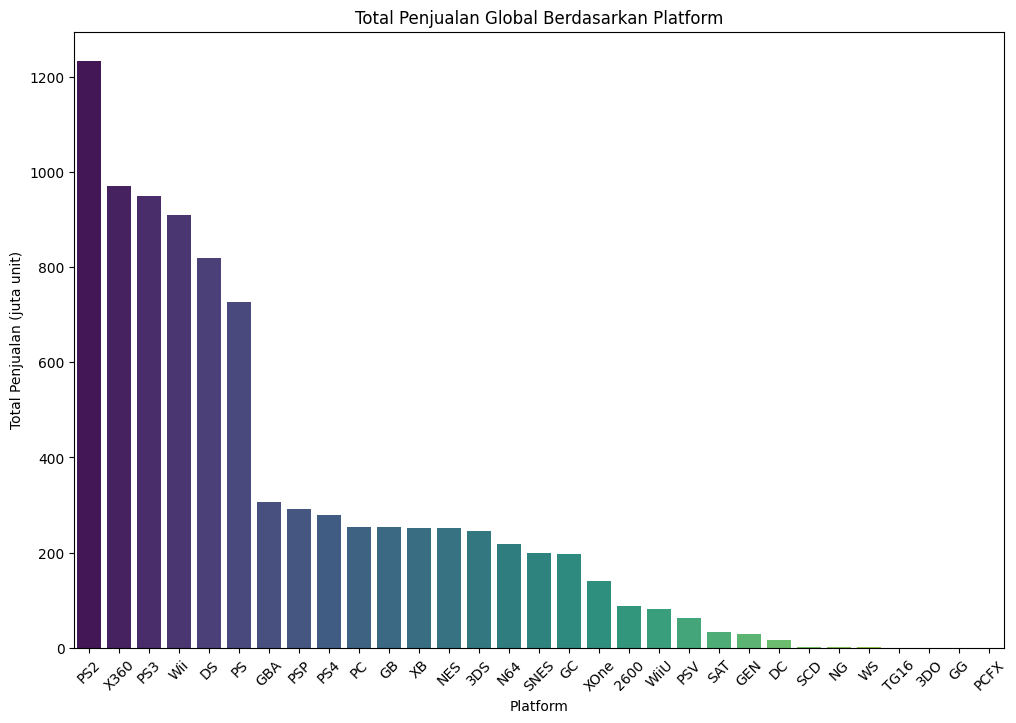

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat barplot untuk penjualan berdasarkan platform
plt.figure(figsize=(12, 8))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="viridis")
plt.title('Total Penjualan Global Berdasarkan Platform')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (juta unit)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-62-3508902137>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Platform', y='Global_Sales', data=df, palette="viridis")


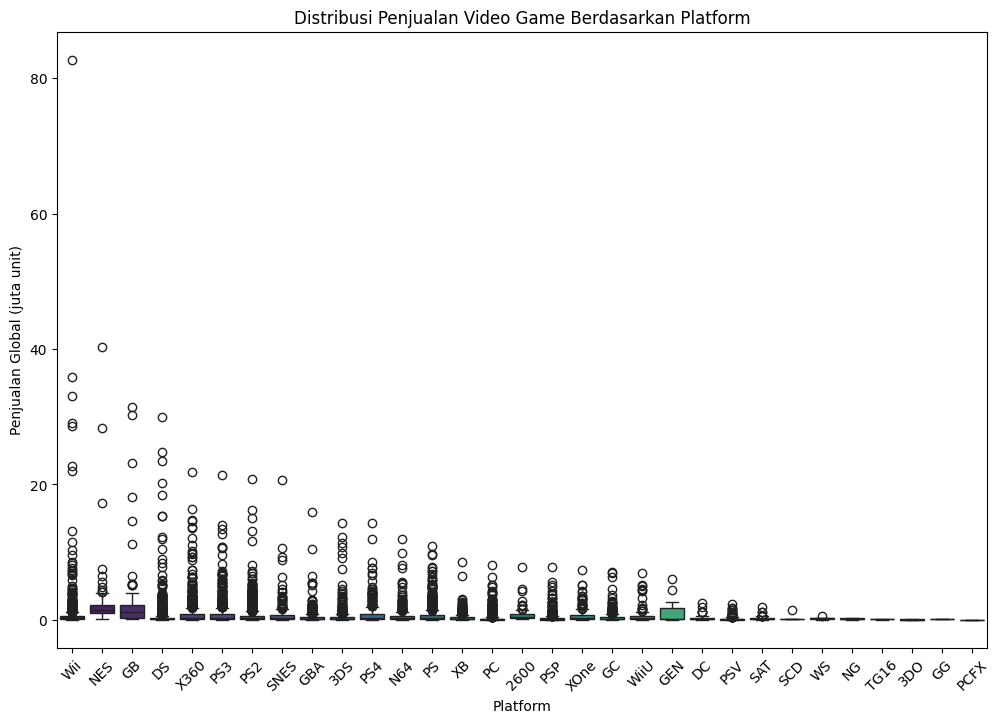

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Platform', y='Global_Sales', data=df, palette="viridis")
plt.title('Distribusi Penjualan Video Game Berdasarkan Platform')
plt.xlabel('Platform')
plt.ylabel('Penjualan Global (juta unit)')
plt.xticks(rotation=45)
plt.show()


## 3. Apakah ada tren musiman dalam penjualan video game dari tahun ke tahun?




In [ ]:
# Kelompokkan data berdasarkan tahun dan hitung total penjualan global
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# Menampilkan penjualan berdasarkan tahun
yearly_sales



,Global_Sales
Year,
1980,11.38
1981,35.77
1982,28.86
1983,16.79
1984,50.36
1985,53.94
1986,37.07
1987,21.74
1988,47.22


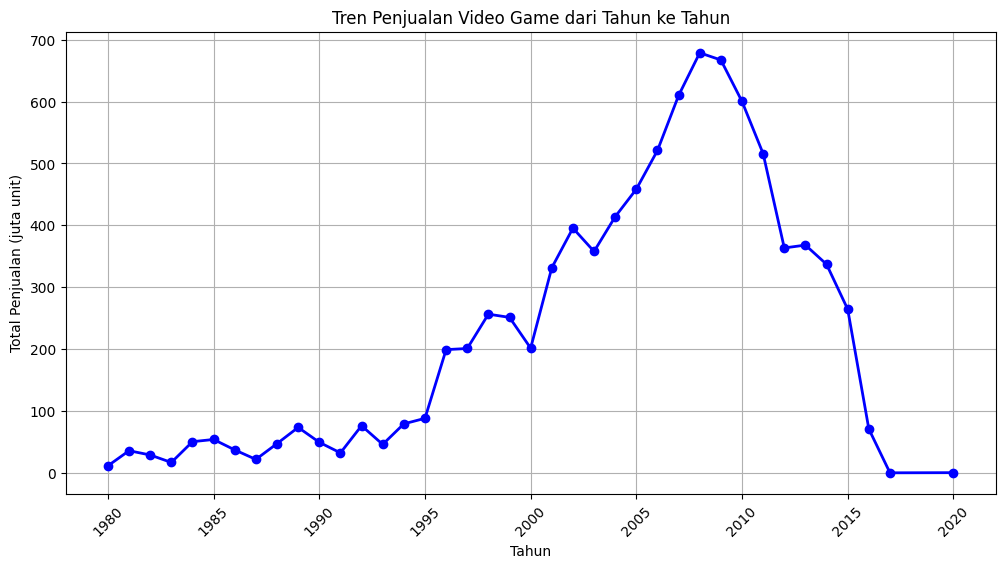

In [ ]:
import matplotlib.pyplot as plt

# Membuat grafik garis untuk tren penjualan berdasarkan tahun
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Tren Penjualan Video Game dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan (juta unit)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


##Apakah ada hubungan antara genre video game dan penjualan global?

In [ ]:
# Menghitung rata-rata penjualan global untuk setiap genre
genre_sales = df.groupby('Genre')['Global_Sales'].mean()

# Menampilkan rata-rata penjualan untuk setiap genre
genre_sales


,Global_Sales
Genre,
Action,0.529942
Adventure,0.184137
Fighting,0.531160
Misc,0.468488
Platform,0.947577
Puzzle,0.424930
Racing,0.593273
Role-Playing,0.628456
Shooter,0.800468


<ipython-input-66-763525761>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")


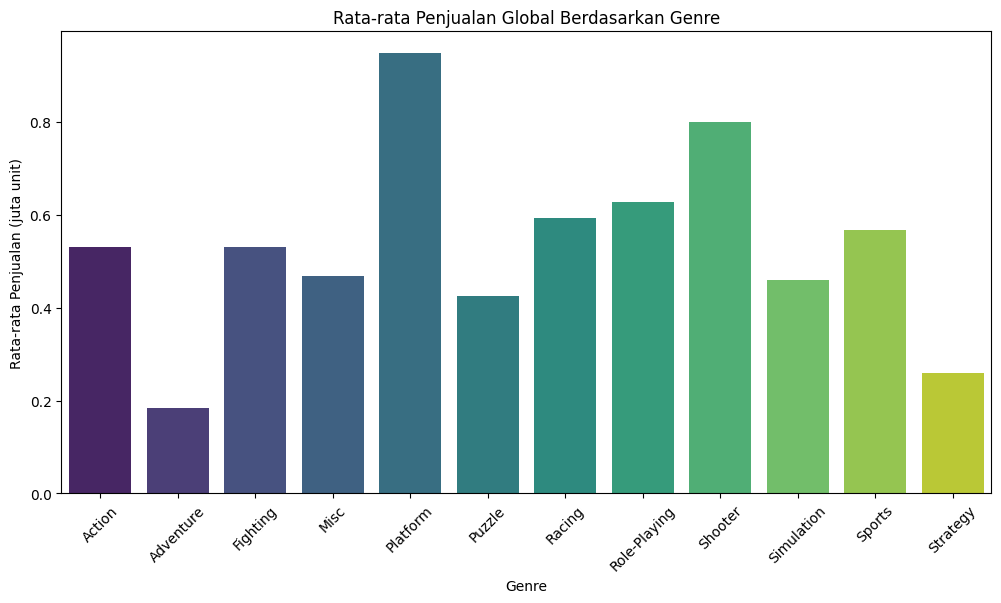

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat barplot untuk rata-rata penjualan berdasarkan genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.title('Rata-rata Penjualan Global Berdasarkan Genre')
plt.xlabel('Genre')
plt.ylabel('Rata-rata Penjualan (juta unit)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-67-2109010216>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Global_Sales', data=df, palette="viridis")


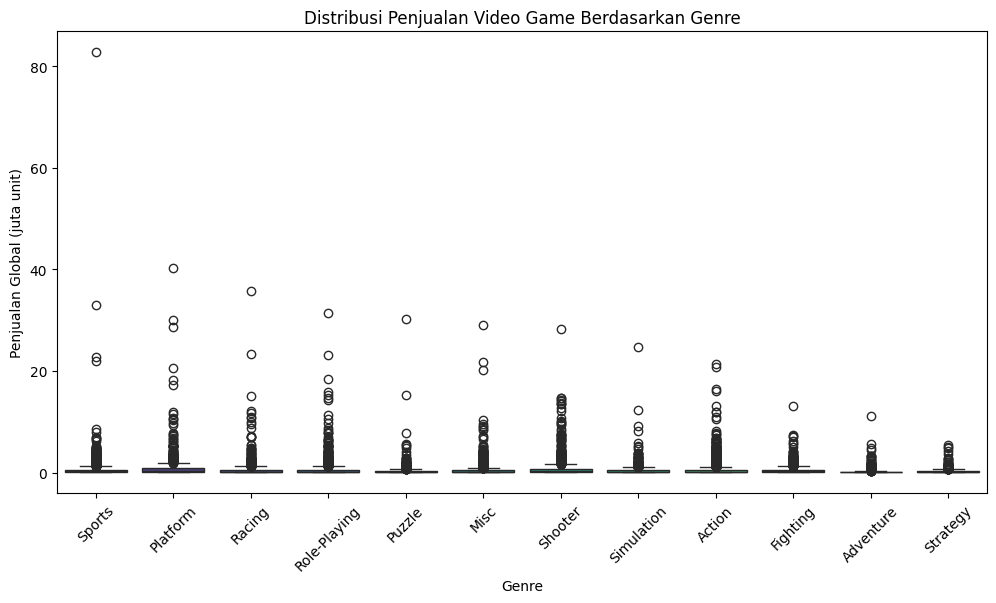

In [ ]:
# Membuat boxplot untuk melihat distribusi penjualan berdasarkan genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df, palette="viridis")
plt.title('Distribusi Penjualan Video Game Berdasarkan Genre')
plt.xlabel('Genre')
plt.ylabel('Penjualan Global (juta unit)')
plt.xticks(rotation=45)
plt.show()


##5. Platform mana yang paling banyak menghasilkan penjualan di setiap wilayah (NA, EU, JP)?

In [ ]:
# Mengelompokkan data berdasarkan platform dan menghitung total penjualan per wilayah
platform_sales_na = df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)
platform_sales_eu = df.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False)
platform_sales_jp = df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False)


<ipython-input-69-3470901238>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales_na.index, y=platform_sales_na.values, palette="Blues_d")


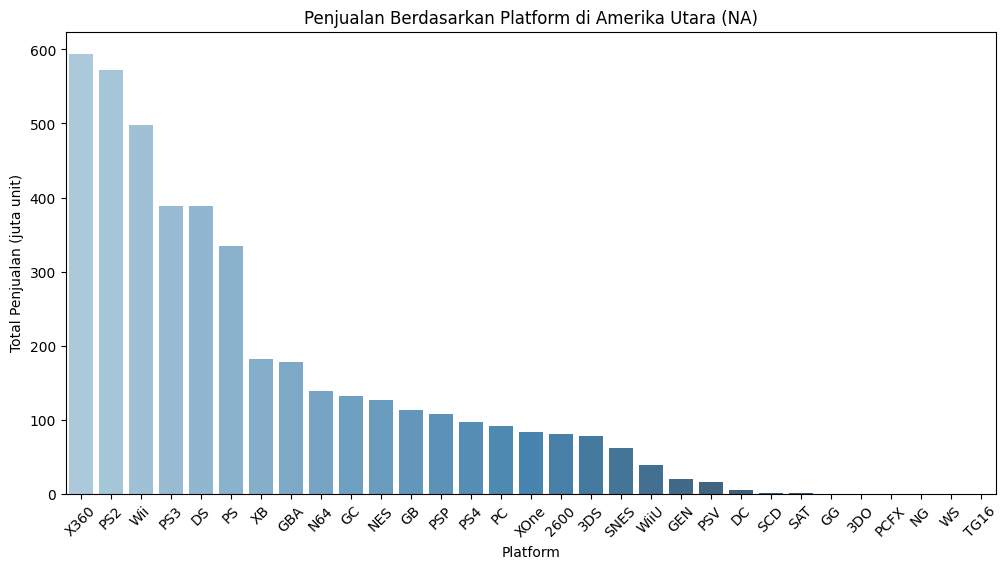

In [ ]:
# Visualisasi penjualan berdasarkan platform di NA
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales_na.index, y=platform_sales_na.values, palette="Blues_d")
plt.title('Penjualan Berdasarkan Platform di Amerika Utara (NA)')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (juta unit)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-70-2669342496>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales_eu.index, y=platform_sales_eu.values, palette="Blues_d")


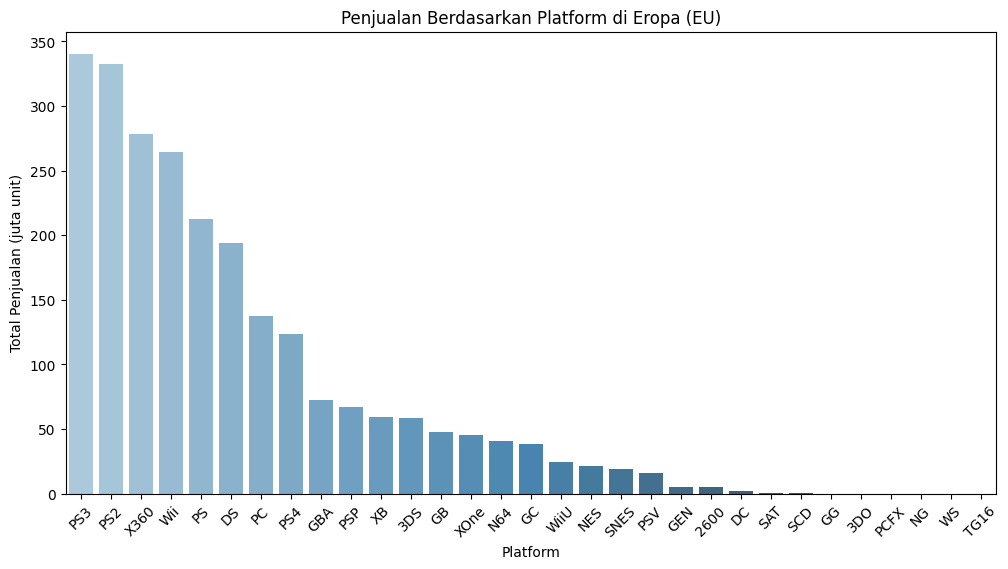

In [ ]:
# Visualisasi penjualan berdasarkan platform di EU
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales_eu.index, y=platform_sales_eu.values, palette="Blues_d")
plt.title('Penjualan Berdasarkan Platform di Eropa (EU)')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (juta unit)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-71-3625362862>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales_jp.index, y=platform_sales_jp.values, palette="Blues_d")


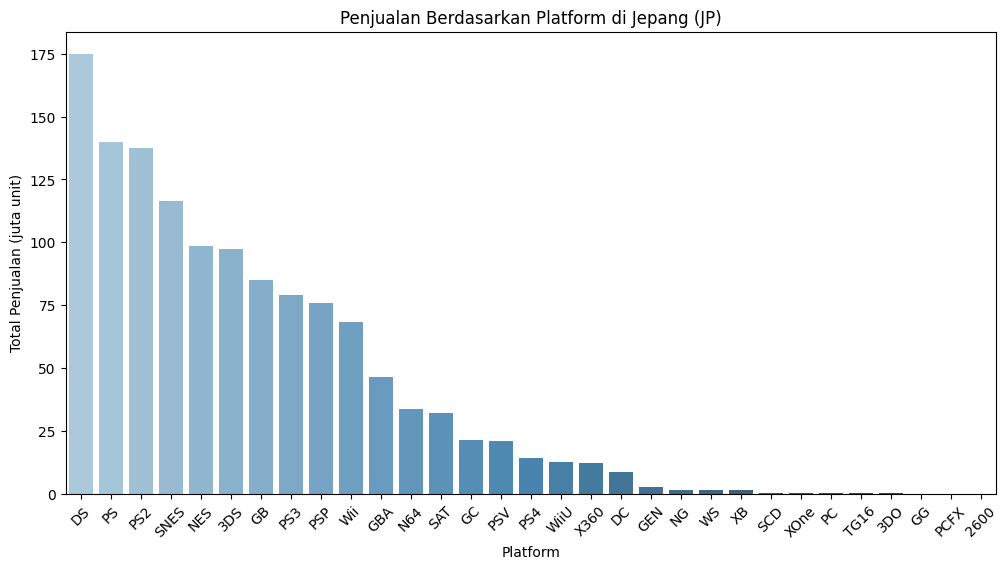

In [ ]:
# Visualisasi penjualan berdasarkan platform di JP
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales_jp.index, y=platform_sales_jp.values, palette="Blues_d")
plt.title('Penjualan Berdasarkan Platform di Jepang (JP)')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (juta unit)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Platform teratas di NA
top_platform_na = platform_sales_na.idxmax()
top_sales_na = platform_sales_na.max()

# Platform teratas di EU
top_platform_eu = platform_sales_eu.idxmax()
top_sales_eu = platform_sales_eu.max()

# Platform teratas di JP
top_platform_jp = platform_sales_jp.idxmax()
top_sales_jp = platform_sales_jp.max()

top_platform_na, top_sales_na, top_platform_eu, top_sales_eu, top_platform_jp, top_sales_jp


('X360', 594.33, 'PS3', 340.47, 'DS', 175.02)

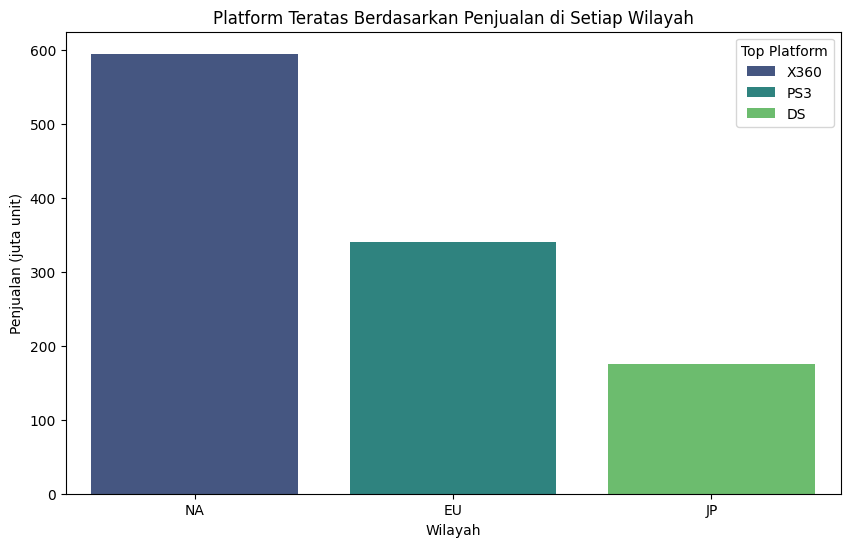

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat DataFrame untuk platform teratas
platforms = ['NA', 'EU', 'JP']
top_platforms = [top_platform_na, top_platform_eu, top_platform_jp]
top_sales = [top_sales_na, top_sales_eu, top_sales_jp]

top_platform_df = pd.DataFrame({
    'Platform': platforms,
    'Top Platform': top_platforms,
    'Sales (juta unit)': top_sales
})

# Visualisasi barplot untuk platform teratas di setiap wilayah
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Sales (juta unit)', hue='Top Platform', data=top_platform_df, palette="viridis")
plt.title('Platform Teratas Berdasarkan Penjualan di Setiap Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Penjualan (juta unit)')
plt.show()


In [ ]:
# Menyimpan dataframe ke file CSV
df.to_csv('/content/processed_vgsales.csv', index=False)


In [ ]:
from google.colab import files
files.download('/content/processed_vgsales.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>